# Homework 4
We load the `music_scaled.csv` dataset ([source](https://archive.ics.uci.edu/ml/datasets/Geographical+Original+of+Music#)). The dataset contains a sample of traditional songs from different cultures. Features F1 to F68 are quantitative summaries of the songs from audio analysis software. These features have been subject to standard scaling. They are stored as predictors in `X.` The latitudes of the countries from which the songs originate are stored as a target variable `y.`

In [100]:
import pandas as pd

data = pd.read_csv("music_scaled.csv")
X = data.iloc[:,:68]
y = data["Latitude"]

Perform linear regression of `y` on `X` using `sklearn.linear_model.LinearRegression` and print the estimated coefficient for F1. Print out the estimated coefficients when the regressors consist of 
- F1 only; 
- F1 and F2 only; 
- F1, F2, and F3 only; 
- F1, F2, F3, ..., and F[k] only; 
- and F1, F2, F3, ..., F[k], ..., and F68. 

In [107]:
# CODE
from sklearn.linear_model import LinearRegression
lst1=[]
for i in range(len(X.columns)):
    xi = data.iloc[:,:i+1]
    reg = LinearRegression().fit(xi,y)
    lst1.append(reg.coef_[0])
print(lst1)

[0.6597339500122643, 1.6699230411781025, 2.2221575866672656, 2.3244270430823457, 2.2682979830127894, 2.8452351924823907, 3.332087022407636, 3.3566789402533175, 3.269856765113631, 3.3032316382786004, 3.292077060415863, 3.3208903646389247, 3.3475351294232616, 3.3268162146365787, 3.2858976426461646, 2.9736230210728642, 2.933209242698423, 5.019515373249277, 6.3640157126787305, 4.998354920508941, 6.364778172303942, 4.133694649943308, 4.7300070938942795, 4.981488781036367, 4.930128203655881, 5.093094310749844, 5.198479732315787, 5.163328587511278, 5.157666806840063, 5.312941265441771, 5.275584887832941, 5.282177798563257, 5.303313147474652, 4.938899882391707, 4.758449191095835, 3.920741356653558, 3.9790838957547656, 3.6551183225111443, 2.5460083465275654, 2.4268589999435224, 2.2171089077738273, 2.310249219251344, 2.5288936609952484, 2.577280845791652, 2.5796880236719355, 2.7779106469450268, 2.7783512985604286, 2.75093887721133, 2.6242632787682307, 2.613819697931086, 2.802340330013317, 2.7307

Compute a full set of principal components of `X` using `sklearn.decomposition.PCA.` Perform linear regression of `y` on the PCs using `sklearn.linear_model.LinearRegression` and print the estimated coefficient for PC1. Print out the estimated coefficients when the regressors consist of 
- PC1 only; 
- PC1 and PC2 only; 
- PC1, PC2, and PC3 only;
- PC1, PC2, PC3, ..., and PC[k] only; 
- and PC1, PC2, PC3, ..., PC[k], ..., and PC68. 

In [108]:
# CODE
from sklearn.decomposition import PCA
pca=PCA(n_components=X.shape[1])
pcs=pca.fit_transform(X)
pcs_new=pd.DataFrame(pcs)
lst2=[]
for j in range(pcs_new.shape[1]):
    pc=pcs_new.iloc[:,:j+1]
    reg2 = LinearRegression().fit(pc,y)
    lst2.append(reg2.coef_[0])
print(lst2)

[-0.0825902273545308, -0.0825902273545308, -0.0825902273545308, -0.0825902273545308, -0.0825902273545308, -0.0825902273545308, -0.0825902273545308, -0.0825902273545308, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453068, -0.08259022735453059, -0.0825902273545306, -0.0825902273545306, -0.08259022735453062, -0.0825902273545306, -0.08259022735453064, -0.08259022735453064, -0.08259022735453064, -0.08259022735453063, -0.08259022735453063, -0.08259022735453064, -0.08259022735453063, -0.08259022735453063, -0.08259022735453064, -0.08259022735453064, -0.08259022735453064, -0.08259022735453066, -0.08259022735453067, -0.08259022735453064, -0.08259022735453066, -0.0825902273545307,

State what you observe and explain the phenomenon in light of the correlation matrices of `X` and the PCs.

### Explanation:


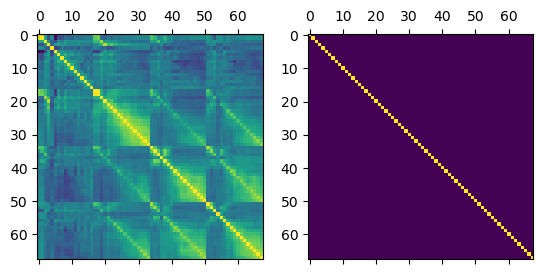

In [106]:
#CODE
import matplotlib.pyplot as plt
ax=plt.subplot(1,2,1); ax.matshow(X.corr())
ax=plt.subplot(1,2,2); ax.matshow(pcs_new.corr())
plt.show()

From the result, we can see that the coefficients for F1 with linear model y on X are different on the choices of different regressors F(k). While for linear regression with a full set of principal components of X and y, it turns out to have the same coefficients for PC1(minor differences can be ignore here because is too "minor") no matter what the regressors consist of. The reason for this phenomenon is that F(K)'s are correlated while PC(k)'s are independent from each other. The plots above also show that PCs are independent and non-linear. 